In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
m=pd.read_csv("measurements.csv")

### Let's inspect the groupby object

- dir(m.groupby) - outputs builtin methods
- dir(m.groupby('sex')) - also outputs columns objects, appliable methods

- getattr(m.groupby('sex'), 'keys') - sex
- hasattr(m.groupby('sex'), 'keys') - True
- callable(m.groupby('sex')) - False
- callable(m.groupby) - True

## Groupby: split, apply, combine

In [3]:
m.groupby('sex').BMI_init.mean()

sex
f    27.857184
m    27.773745
Name: BMI_init, dtype: float64

### .get_group - outputs a dataframe

In [4]:
m.groupby('sex').get_group('f').shape

(30, 38)

In [5]:
m.groupby('sex').get_group('f').chol_init.values

array([183., 185., 188., 178., 178., 163., 163., 181., 184., 185., 188.,
       163., 178., 186., 174., 186.,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

In [6]:
m.groupby('sex')['ID'].get_group('f').values  #also works on the series groupby object

array(['t1', 't3', 't4', 't8', 't10', 't11', 't12', 't14', 't16', 't17',
       't21', 't22', 't29', 't30', 't35', 't40', 'c5', 'c8', 'c11', 'c12',
       'c16', 'c18', 'c19', 'c22', 'c24', 'c26', 'c32', 'c33', 'c34',
       'c37'], dtype=object)

In [7]:
m.groupby('sex').get_group('f').chol_init[0]

183.0

### .groups - outputs a dictionary of row indices

In [8]:
m.groupby('sex')

In [9]:
m.groupby('sex').groups     #.indices does the same thing

{'f': [0, 2, 3, 7, 9, 10, 11, 13, 15, 16, 20, 21, 28, 29, 34, 39, 44, 47, 50, 51, 55, 57, 58, 61, 63, 65, 71, 72, 73, 76], 'm': [1, 4, 5, 6, 8, 12, 14, 17, 18, 19, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 48, 49, 52, 53, 54, 56, 59, 60, 62, 64, 66, 67, 68, 69, 70, 74, 75, 77, 78, 79]}

In [10]:
type(m.groupby('sex').groups)

pandas.io.formats.printing.PrettyDict

In [11]:
m.groupby('sex').groups['f']

Int64Index([ 0,  2,  3,  7,  9, 10, 11, 13, 15, 16, 20, 21, 28, 29, 34, 39, 44,
            47, 50, 51, 55, 57, 58, 61, 63, 65, 71, 72, 73, 76],
           dtype='int64')

In [12]:
m.groupby('sex').groups['f'][3]

7

In [13]:
m.loc[m.groupby('sex').groups['f']].shape

(30, 38)

### Iterate over .groupby

In [14]:
for i in m.groupby('sex'):
    print(type(i))
#using just one value outputs a tuple, containing a pair consisting of group name and group dataframe

<class 'tuple'>
<class 'tuple'>


In [15]:
for i, j in m.groupby('sex'):
    print('group name: ', i, '\ngroup shape: ', j.shape, '\n')
# groupby can be iterated over with two variables, but not more than two
# it outputs the group name and a group dataframe

group name:  f 
group shape:  (30, 38) 

group name:  m 
group shape:  (50, 38) 



In [16]:
for i in m.groupby('sex'):
    print(type(i[0]), type(i[1]))
#you can access the tuple elements

<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>


In [17]:
for i in m.groupby('sex'):
    print(i[0], i[1].shape)

f (30, 38)
m (50, 38)


In [18]:
print([[i[0], i[1].shape] for i in m.groupby('sex')])

[['f', (30, 38)], ['m', (50, 38)]]


In [19]:
m.groupby('sex').apply(lambda x: x.shape)

sex
f    (30, 38)
m    (50, 38)
dtype: object

In [60]:
for i in m.items():                         #.items used to iterate over df columns and returns a tuple in a similar way
    print(i[0], i[1].count(), end =' ')

ID 80 group 80 sex 80 birth_year 40 chol_init 40 chol_final 40 trig_init 40 trig_final 40 weight_init 80 weight_final 80 weight_diff 80 height_init 80 height_final 80 height_diff 80 armspan_init 80 armspan_final 80 armspan_diff 80 arm_perimeter_init 80 arm_periemter_final 80 arm_perimeter_diff 80 thorax_perimeter_init 80 thorax_perimeter_final 80 thorax_perimeter_diff 80 abdominal_perimeter_init 80 abdominal_perimeter_final 80 abdominal_perimeter_diff 80 hip_perimeter_init 80 hip_perimeter_final 80 hip_perimeter_diff 80 BMI_init 80 BMI_final 80 BMI_diff 80 tricipital_fold_final 40 tricipital_fold_init 40 abdominal_fold_final 40 abdominal_fold_init 40 subscapular_fold_final 40 subscapular_fold_init 40 

### Aggregation functions

In [20]:
m.groupby('sex').chol_init.count()      #only non-null values

sex
f    16
m    24
Name: chol_init, dtype: int64

In [21]:
m.groupby('sex').chol_init.describe()   #also non-null values

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,16.0,178.937500,8.842841,163.0,177.0,182.0,185.25,188.0
m,24.0,178.916667,6.723849,163.0,174.0,180.0,183.50,188.0


In [22]:
m.groupby('sex').chol_init.mean()

sex
f    178.937500
m    178.916667
Name: chol_init, dtype: float64

In [61]:
m.groupby('sex').chol_init.nunique()

sex
f     9
m    13
Name: chol_init, dtype: int64

In [23]:
m.groupby('sex').chol_init.agg([np.mean,np.median,np.min,min,'min',np.max,np.std,np.var,np.sum,len,'count'])
#by passing a dict you can specify names and specific functions for specific columns

,mean,median,min,min,min,max,std,var,sum,len,count
sex,,,,,,,,,,,
f,178.937500,182.0,163.0,163.0,163.0,188.0,8.842841,78.195833,2863.0,30,16
m,178.916667,180.0,163.0,163.0,163.0,188.0,6.723849,45.210145,4294.0,50,24


In [24]:
m.groupby(['group','sex']).BMI_init.agg([np.mean,np.median,np.min,min,'min',np.max,np.std,np.var,np.sum,len,'count'])

mean     median        min        min        min        max  \
group   sex                                                                     
Control f    26.290459  26.333368  21.490184  21.490184  21.490184  31.398180   
        m    26.437273  25.940107  21.980992  21.980992  21.980992  32.792980   
Test    f    29.228068  27.764489  26.349584  26.349584  26.349584  34.866892   
        m    29.221589  29.597232  24.351962  24.351962  24.351962  35.911111   

                  std       var         sum  len  count  
group   sex                                              
Control f    2.639024  6.964447  368.066430   14     14  
        m    2.508389  6.292015  687.369106   26     26  
Test    f    2.839366  8.061999  467.649090   16     16  
        m    2.434661  5.927576  701.318135   24     24

### Multi-index grouping

In [90]:
m.groupby(['group', 'sex']).ngroups

4

In [25]:
m.groupby(['group','sex']).BMI_init.mean()

group    sex
Control  f      26.290459
         m      26.437273
Test     f      29.228068
         m      29.221589
Name: BMI_init, dtype: float64

In [26]:
m.groupby(['group','sex']).get_group(('Test','f')).shape

(16, 38)

In [27]:
m.groupby(['group','sex']).groups

{('Control', 'f'): [44, 47, 50, 51, 55, 57, 58, 61, 63, 65, 71, 72, 73, 76], ('Control', 'm'): [40, 41, 42, 43, 45, 46, 48, 49, 52, 53, 54, 56, 59, 60, 62, 64, 66, 67, 68, 69, 70, 74, 75, 77, 78, 79], ('Test', 'f'): [0, 2, 3, 7, 9, 10, 11, 13, 15, 16, 20, 21, 28, 29, 34, 39], ('Test', 'm'): [1, 4, 5, 6, 8, 12, 14, 17, 18, 19, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 36, 37, 38]}

In [28]:
for i in m.groupby(['group','sex']):
    print(i[0], i[1].shape)

('Control', 'f') (14, 38)
('Control', 'm') (26, 38)
('Test', 'f') (16, 38)
('Test', 'm') (24, 38)


group    sex
Control  f      AxesSubplot(0.125,0.11;0.775x0.77)
         m      AxesSubplot(0.125,0.11;0.775x0.77)
Test     f      AxesSubplot(0.125,0.11;0.775x0.77)
         m      AxesSubplot(0.125,0.11;0.775x0.77)
Name: BMI_init, dtype: object

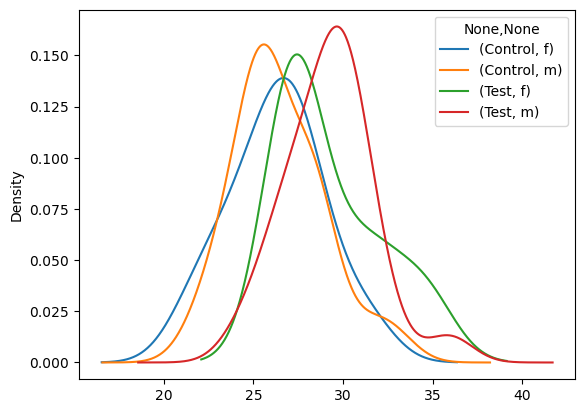

In [30]:
m.groupby(['group', 'sex']).BMI_init.plot.kde(legend=True)